---
## Differential Evolution(DE)
- purpose: 
    - multi-dimensional, real-value(continuous search space) optimization
    - **multi-dimesional search space를 탐색할 때 탐색cost가 커지는 문제를 제어**

- steps: 
    - mutation, crossover, selection step으로 구성됨(GA와 순서에 차이)
    - population: 각 individual은 실수형 vector로서 search points를 의미함(탐색 대상은 모델(function) parameter) 
    - mutation은 3개 랜덤벡터와 differential weight를 가진 선형변환(a + F * (b - c))
        - **differential weight F는 mutation정도 수준을 결정해 global search radius를 제어하는 것으로 볼 수 있음**
        - **crossover는 선형변환으로 만들어진 mutation을 CR비율만큼 단순 반영하는 것임**
        - **따라서, DE의 mutation과 crossover는 high-dimensional search를 효율적으로 하도록 결합해진 형태로 볼 수 있음**
- usage:
    - complex function optimization에 사용
    - **Gradient를 사용하지 않는 optimization**으로써, 미분가능하지 않거나, continuous, noisy, 시간에 따라 변하는 Optimization 문제에 적용 가능 
    - parallel computing, multi-objective, contraint optimization 적용가능

## DE_fitting_multidimesional_non-linear_function

In [33]:
import numpy as np

def fobj(x):
    
    # fitness function is defined as minimizing vector dot product length.  
    value = 0
    for i in range(len(x)):
        value += x[i]**2
    return value / len(x)

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):

    # generate random population
    #20*32(n*dim) vectors filled with real value(prob.) in [0~1]
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    
    # calc. the denormalized vectors of population
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    
    # fitness scores for denormalized vectors of population
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])

    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    
    for i in range(its):
        for j in range(popsize):
            
            # 3*32(n*dim) vectors randomly chosen from populaion
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            
            # mutation is linear transf. of 3 random vectors w/ differential weight 0.8
            mutant = np.clip(a + mut * (b - c), 0, 1)
            
            # take rand multivariate, cross_points
            cross_points = np.random.rand(dimensions) < crossp
            
            # mark its each dim. True, if it is < crossover prob. 0.7
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            
            # cross_point가 true인 위치에 mutant값, false위치에 individual값    
            trial = np.where(cross_points, mutant, pop[j])
            
            # denormalize to calc. fitness score
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            
            # if f is lower, set the fitter as an individual 
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                
                # if f is lowest, set the fittest
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
                    
        yield best, fitness[best_idx]
        

sol. is 
 [-0.00059571  0.00191073 -0.00186044  0.00420586 -0.00568311 -0.00245569
 -0.00215058  0.00086746  0.00162041  0.00144737  0.0009572   0.00534128
 -0.00742438  0.00238295  0.00388554  0.00157263 -0.00537227  0.00047927
  0.00501834 -0.00303645  0.00259115  0.00339052 -0.00054047  0.00269476
  0.00318701 -0.00866648 -0.00390759 -0.00747078 -0.0005268  -0.00774903
  0.00297628 -0.00034255] 
 note that cost is not zero 1.550950342071734e-05

run time is 5.260102987289429


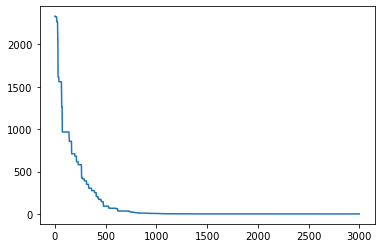

In [2]:
import matplotlib.pyplot as plt
import time

#result = list(de(lambda x: x**2 / len(x), bounds=[(-100, 100)] * 32, its=3000))
start = time.time()
# note tha input is 32 dimensional vector.
result = list(de(fobj, bounds=[(-100, 100)] * 32, its=3000))
end = time.time()
print("sol. is \n {} \n note that cost is not zero {}".format(result[-1][0],result[-1][1]))
print()
print("run time is {}".format(end-start))
x, f = zip(*result)
plt.plot(f)

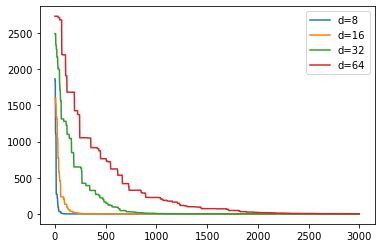

In [3]:
# plot fitness converge depending on dimensionality
for d in [8, 16, 32, 64]:
    it = list(de(lambda x: sum(x**2)/d, [(-100, 100)] * d, its=3000))    
    x, f = zip(*it)
    plt.plot(f, label='d={}'.format(d))
plt.legend()

## Michalewicz function[https://www.sfu.ca/~ssurjano/michal.png]

In [55]:
def Micha_fobj(x):
    
    # fitness function is defined as minimizing vector dot product length.  
    value = 0
    for i in range(len(x)):
        value += np.sin(x[i])*(np.sin(((i+1)*(x[i]**2))/np.pi)**20)
        
    #return value
    return (-1)*value

sol. is 
 [2.20290552 1.57079632] 
 note that cost is not zero -1.8013034100985537
sol. is 
 [2.20290552 1.57079633 1.28499157 1.92305847 1.72046977] 
 note that cost is not zero -4.68765817908815
sol. is 
 [2.20290552 1.57079632 1.28499157 1.92305847 1.72046977 1.57079633
 1.45441397 1.75608652 1.65571742 1.57079633] 
 note that cost is not zero -9.660151715641348


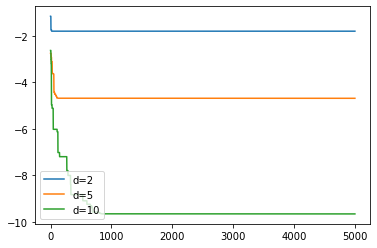

In [61]:
for d in [2, 5,10]:
    result = list(de(Micha_fobj, bounds=[(0, np.pi)] * d, its=5000))
    print("sol. is \n {} \n note that cost is not zero {}".format(result[-1][0],result[-1][1]))

    x, f = zip(*result)
    plt.plot(f, label='d={}'.format(d))
plt.legend()

In [66]:
np.random.randn(5, 3) 
np.random.randn(3) 

array([ 0.97287429, -0.19727518, -1.74046204])

# DE_2.0

In [39]:
import numpy as np

def fobj(x):
    reward = np.sum(np.square(solution - x), axis=1)
    return reward

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=5000, its=1000):

    # generate random population
    #20*32(n*dim) vectors filled with real value(prob.) in [0~1]
    dimensions = len(bounds)
    pop = np.random.randn(popsize, dimensions)
    
    # calc. the denormalized vectors of population
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    
    # fitness scores for denormalized vectors of population
    #fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    fitness = fobj(pop_denorm)
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
        
    for i in range(1):
        
        # print current fitness of the most likely parameter setting
        if i % 20 == 0:
            print('iter %d. w: %s, solution: %s, reward: %f' % 
              (i, str(best), str(solution), fitness[best_idx]))      
        
        # pick a,b,c out of 5000. ignore duplicates
        idxs = np.random.randint(0,popsize,size=(popsize,3))
        abc = pop[idxs]
        mutant = np.clip(abc[:, 0] + .8 * (abc[:, 1] - abc[:, 2]), 0, 1)
        
        cross_points = np.random.rand(popsize,dimensions) < 0.7
        
        # ignore all dimensions False case
        
        trial = np.where(cross_points, mutant, pop)

        trial_denorm = min_b + trial * diff

        f = fobj(trial_denorm)
        
        pop[f < fitness] = trial[f < fitness]
        fitness = f
        
        best_idx = fitness.argmin()
        best     = trial_denorm[best_idx]
                    
        yield best, fitness[best_idx]
        

iter 0. w: [21.3297103  -1.80916293 17.05070246], solution: [ 0.5  0.1 -0.3], reward: 738.568610
[[ 0.         -2.17205519  0.        ]
 [ 0.57728886  0.64324569  0.26010704]
 [ 0.53021524  1.          1.        ]
 ...
 [ 0.33613667 -1.26858402  0.41980469]
 [ 1.12955842  0.          0.        ]
 [ 0.          0.73789868  0.        ]]


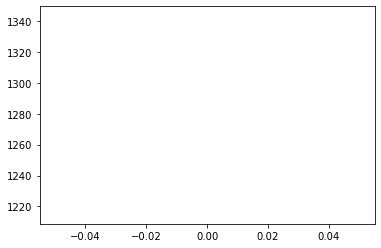

In [40]:
import matplotlib.pyplot as plt

solution = np.array([0.5, 0.1, -0.3])

result = list(de(fobj, bounds=[(-100, 100)] * 3, its=300))

x, f = zip(*result)
plt.plot(f)